In [87]:
import pandas as pandas
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.inspection import  permutation_importance
import matplotlib.pyplot as mplt

train_data = pandas.read_csv("datasets/credit_train.csv") #carregar csv de treino
test_data = pandas.read_csv("datasets/credit_test.csv") #carregar csv de teste
train_data.drop(['Months since last delinquent', 'Loan ID', 'Customer ID'],axis=1, inplace=True)
train_data.dropna(axis = 0, inplace = True) #retirar valores nulos
train_data.drop_duplicates(inplace = True) #retirar valores duplicados
label_enconder = LabelEncoder()
train_data['Loan Status'] = label_enconder.fit_transform(train_data['Loan Status'])
train_data['Term'] = label_enconder.fit_transform(train_data['Term'])
train_data['Purpose'] = label_enconder.fit_transform(train_data['Purpose'])
train_data['Home Ownership'] = label_enconder.fit_transform(train_data['Home Ownership'])
train_data['Years in current job'] = label_enconder.fit_transform(train_data['Years in current job'])

In [44]:
X = train_data.drop(labels = 'Loan Status', axis = 1).values
y = train_data['Loan Status'].values

x_train , x_test , y_train , y_test = train_test_split(X,y, test_size= 0.30, random_state =86)

standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.fit_transform(x_test)

In [66]:
log_reg = LogisticRegression(random_state=86)
log_reg.fit(x_train, y_train)
log_reg.score(x_train , y_train)
y_pred = log_reg.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)
print(precision_score(y_test, y_pred)*100)
print(recall_score(y_test, y_pred)*100)
print(f1_score(y_test, y_pred)*100)

82.39245320294366
81.15949688193636
100.0
89.60004667580733


In [67]:
rand_forest = RandomForestClassifier(max_depth=16,max_features=16)
rand_forest.fit(x_train, y_train)
rand_forest.score(x_train,y_train)
y_pred = rand_forest.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)
print(precision_score(y_test, y_pred)*100)
print(recall_score(y_test, y_pred)*100)
print(f1_score(y_test, y_pred)*100)

81.59233466686423
81.78985348786355
97.42137136159407
88.92389075455438


In [69]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn.score(x_train, y_train)
y_pred = knn.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)
print(precision_score(y_test, y_pred)*100)
print(recall_score(y_test, y_pred)*100)
print(f1_score(y_test, y_pred)*100)

79.79947646564924
82.01761864165957
93.97017646675782
87.58800679776645


In [70]:
dec_tree = DecisionTreeClassifier(max_depth=16, max_features=16)
dec_tree.fit(x_train, y_train)
dec_tree.score(x_train, y_train)
y_pred = dec_tree.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)
print(precision_score(y_test, y_pred)*100)
print(recall_score(y_test, y_pred)*100)
print(f1_score(y_test, y_pred)*100)

76.11004099372747
82.49320484309365
86.95708797291137
84.666349659217


In [71]:
xg = XGBClassifier()
xg.fit(x_train, y_train)
xg.score(x_train, y_train)
y_pred = xg.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)
print(precision_score(y_test, y_pred)*100)
print(recall_score(y_test, y_pred)*100)
print(f1_score(y_test, y_pred)*100)

78.60423766483923
82.66279552053089
90.84456599596275
86.56077433765589


Feature: 0, Score: 2.63960
Feature: 1, Score: 0.32272
Feature: 2, Score: -1.91485
Feature: 3, Score: 0.36547
Feature: 4, Score: -0.02477
Feature: 5, Score: -0.13529
Feature: 6, Score: -0.04433
Feature: 7, Score: -0.21107
Feature: 8, Score: 0.03528
Feature: 9, Score: -0.02383
Feature: 10, Score: -0.01784
Feature: 11, Score: -0.12560
Feature: 12, Score: 1.71669
Feature: 13, Score: 0.02309
Feature: 14, Score: -0.01544


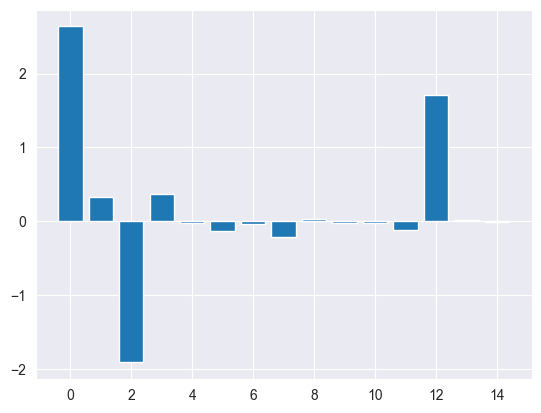

In [82]:
importance_log_reg = log_reg.coef_[0]
for i,v in enumerate(importance_log_reg):
    print('Feature: %0d, Score: %.5f' % (i,v))

mplt.bar([x for x in range(len(importance_log_reg))], importance_log_reg)
mplt.show()

Feature: 0, Score: 0.13117
Feature: 1, Score: 0.00853
Feature: 2, Score: 0.48964
Feature: 3, Score: 0.06302
Feature: 4, Score: 0.01877
Feature: 5, Score: 0.00813
Feature: 6, Score: 0.01570
Feature: 7, Score: 0.06592
Feature: 8, Score: 0.05704
Feature: 9, Score: 0.02758
Feature: 10, Score: 0.00395
Feature: 11, Score: 0.05233
Feature: 12, Score: 0.05263
Feature: 13, Score: 0.00271
Feature: 14, Score: 0.00287


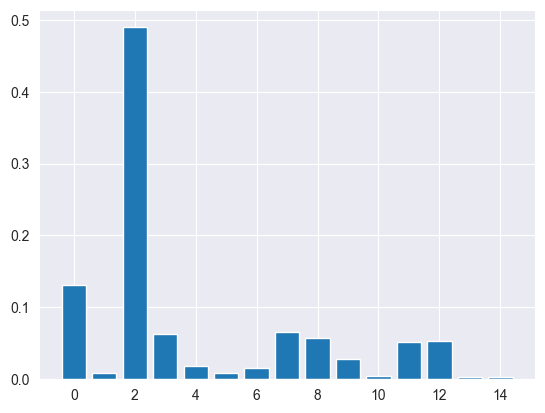

In [80]:
importance_dec_tree= dec_tree.feature_importances_
for i,v in enumerate(importance_dec_tree):
    print('Feature: %0d, Score: %.5f' % (i,v))

mplt.bar([x for x in range(len(importance_dec_tree))], importance_dec_tree)
mplt.show()

Feature: 0, Score: 0.13433
Feature: 1, Score: 0.00994
Feature: 2, Score: 0.43776
Feature: 3, Score: 0.07881
Feature: 4, Score: 0.02462
Feature: 5, Score: 0.00988
Feature: 6, Score: 0.01713
Feature: 7, Score: 0.06944
Feature: 8, Score: 0.05740
Feature: 9, Score: 0.03501
Feature: 10, Score: 0.00448
Feature: 11, Score: 0.05659
Feature: 12, Score: 0.05926
Feature: 13, Score: 0.00325
Feature: 14, Score: 0.00210


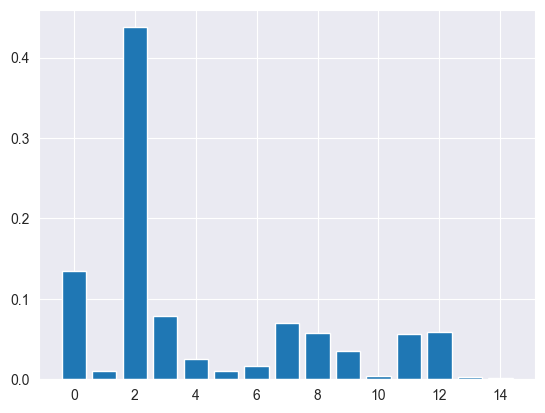

In [86]:
importance_rand_forest = rand_forest.feature_importances_
for i,v in enumerate(importance_rand_forest):
    print('Feature: %0d, Score: %.5f' % (i,v))

mplt.bar([x for x in range(len(importance_rand_forest))], importance_rand_forest)
mplt.show()

In [90]:
results = permutation_importance(knn, x_train, y_train, scoring='accuracy')
importance_knn = results.importances_mean
for i,v in enumerate(importance_knn):
    print('Feature: %0d, Score: %.5f' % (i,v))

mplt.bar([x for x in range(len(importance_knn))], importance_knn)
mplt.show()

KeyboardInterrupt: 

Feature: 0, Score: 0.13328
Feature: 1, Score: 0.10137
Feature: 2, Score: 0.41637
Feature: 3, Score: 0.03680
Feature: 4, Score: 0.02548
Feature: 5, Score: 0.03400
Feature: 6, Score: 0.03312
Feature: 7, Score: 0.03027
Feature: 8, Score: 0.02607
Feature: 9, Score: 0.02478
Feature: 10, Score: 0.02699
Feature: 11, Score: 0.02681
Feature: 12, Score: 0.02813
Feature: 13, Score: 0.02801
Feature: 14, Score: 0.02851


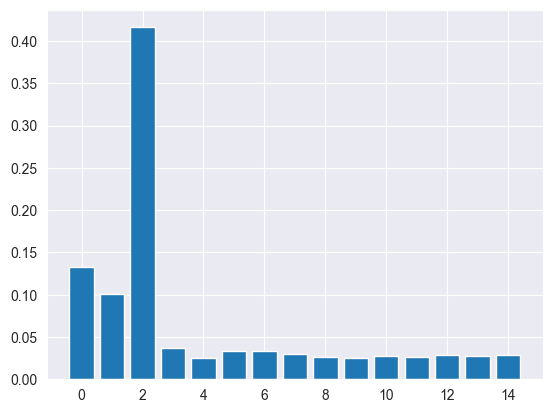

In [89]:
importance_xg = xg.feature_importances_
for i,v in enumerate(importance_xg):
    print('Feature: %0d, Score: %.5f' % (i,v))

mplt.bar([x for x in range(len(importance_xg))], importance_xg)
mplt.show()